# 尋找銀行行銷活動目標客戶

## 1. 載入相關套件

In [1]:
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

## 載入資料集

In [2]:
df = pd.read_csv('./data/banking.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


## 2. 資料清理、資料探索與分析

<AxesSubplot:xlabel='y', ylabel='count'>

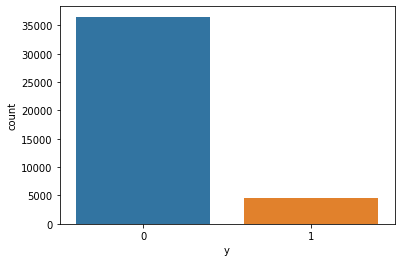

In [3]:
# y 各類別資料筆數統計
import seaborn as sns
sns.countplot(x='y', data=df)

In [4]:
# y 各類別資料筆數統計
df.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

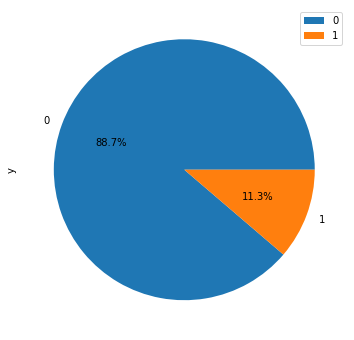

In [5]:
from matplotlib import pyplot as plt

series1 = df.y.value_counts()
series1.plot.pie(figsize=(6,6), autopct='%1.1f%%')
plt.legend()
plt.show()

In [6]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data1=df.join(cat_list)
    df=data1
    
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=df[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'mo

In [7]:
df = data_final

In [8]:
# 是否有含遺失值(Missing value)
df.isnull().sum()

age                     0
duration                0
campaign                0
pdays                   0
previous                0
                       ..
day_of_week_tue         0
day_of_week_wed         0
poutcome_failure        0
poutcome_nonexistent    0
poutcome_success        0
Length: 64, dtype: int64

## 3. 不須進行特徵工程

## 4. 資料分割

In [9]:
# 指定X，並轉為 Numpy 陣列
X = df.drop('y', axis=1).values
y = df.y.values

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32950, 63), (8238, 63), (32950,), (8238,))

## 特徵縮放

In [10]:
scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 5. 選擇演算法

In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

## 6. 模型訓練

In [12]:
clf.fit(X_train_std, y_train)

LogisticRegression()

## 7. 模型計分

In [13]:
y_pred = clf.predict(X_test_std)

# 計算準確率
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%') 

91.53%


In [14]:
# 混淆矩陣
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[7158  179]
 [ 519  382]]


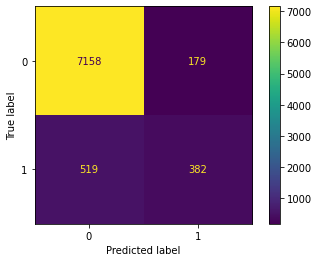

In [16]:
# 混淆矩陣圖
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7337
           1       0.68      0.42      0.52       901

    accuracy                           0.92      8238
   macro avg       0.81      0.70      0.74      8238
weighted avg       0.90      0.92      0.91      8238



## 8. 模型評估，暫不進行

## 9. 模型佈署，暫不進行